# **Forcasting Crypto**

**Author**: Rizal Aditya <br>

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/rzladitya/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/hujikan2)](https://github.com/hujikan2)
-----

# **Prerequisites**
Before we start the coding part, make sure that you have set up your Python 3 environment and required packages. If you don’t have an environment set up yet, you can follow the steps in this [tutorial](https://www.relataly.com/anaconda-python-environment-machine-learning/1663/) to set up the Anaconda environment.

Diagram flow Crypto

```
`# This is formatted as code`
```

 Price Prediction:
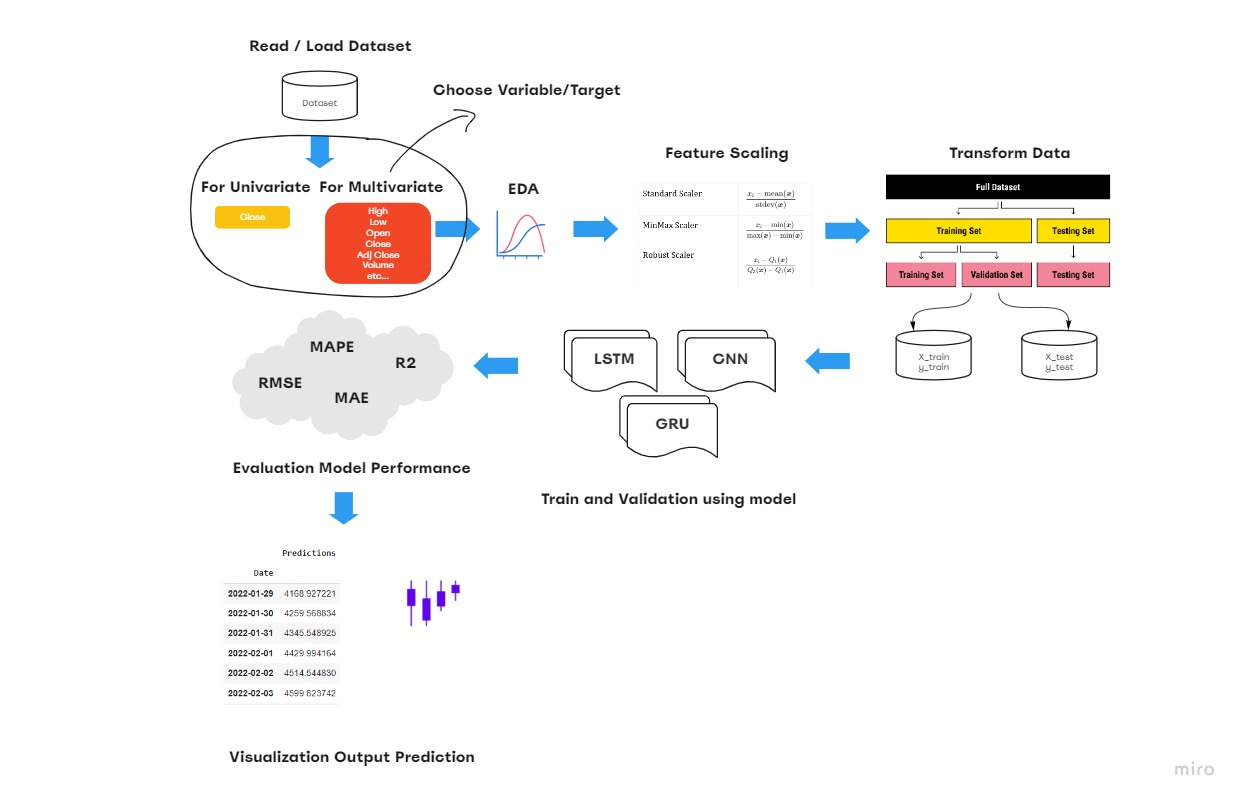

# **1. Import required Library/Packaged**

**Package/Library commonly used**

*   import pandas as pd = Additional functions for analysing and manipulating data
*   import random = It can be used to perform some random action like to get a random number
*   import time = Time Functions
*   import math = Mathematical functions 
*   import numpy as np = Fundamental package for scientific computing with Python
*   import os = Module in Python provides functions for interacting with the operating system
*   import datetime = Date Functions
*   from datetime import timedelta = Date Functions

<br>

**Package/Library for Model**

*   import tensorflow as tf = Package for Deep learning
*   from tensorflow.keras.models import * = Deep learning library, used for neural networks
*   from tensorflow.keras.layers import * = Deep learning classes for recurrent and regular densely-connected layers
*   from tensorflow.keras.callbacks import * = Deep learning callbacks function during model training

<br>

**Package/Library for Visualization Data**

*   import matplotlib.pyplot as plt 
*   import plotly.graph_objects as go  
*   import plotly.express as px 

<br>

**Package/Library for preprocessing and evaluation**

*   from sklearn import preprocessing = Package for preprocessing data
*   from sklearn.model_selection import train_test_split = Packages for split the data into two parts, training and testing
*   from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score = Packages for measuring model performance / errors
*   from math import sqrt = Built-in math library function in Python that returns the square root

In [37]:
import pandas as pd
import random
import time
import math
import numpy as np
import os
import datetime as dt
from datetime import timedelta
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

Tensorflow version: 2.8.2


# **2. Load the Time Series Data**

In [38]:
# Create variable to read dataset in various format (csv, xlsx, txt, etc)
btc_df = pd.read_csv('dataset/second question/Binance_BTCUSDT_d.csv')

In [39]:
# Short date from lower to high
btc_df = btc_df.sort_values(by=['date'])

# **3. Explore the Data**

Let’s first familiarize ourselves with the data before taking further steps. When dealing with time-series data, line plots are the best choice to gain an initial understanding of our data.

In [40]:
# Create linecahart in plottly
fig_olhc = px.line(btc_df, x="date", y="close", width=1130, height=400)
fig_olhc.add_scatter(x=btc_df['date'], y=btc_df['low'], mode='lines',name='Low')
fig_olhc.add_scatter(x=btc_df['date'], y=btc_df['close'], mode='lines',name='Close')
fig_olhc.add_scatter(x=btc_df['date'], y=btc_df['high'], mode='lines',name='High')
fig_olhc.add_scatter(x=btc_df['date'], y=btc_df['open'], mode='lines',name='Open')
fig_olhc.update_layout( font_color="black", title_font_family="Times New Roman",
                         title_font_color="black", showlegend=True,
                         title={'text': "Whole period of timeframe of Bitcoin close price 2018-2022",'y':0.94,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                         legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))
fig_olhc.update_xaxes(title_text='Date')
fig_olhc.update_yaxes(title_text='BTC Price')
fig_olhc.show()

# Showing volume in BTC
fig_volume = px.line(btc_df, x=btc_df['date'], y="Volume BTC", width=1130, height=400, title="BTC Volume")
fig_volume.update_xaxes(title_text='Date')
fig_volume.update_yaxes(title_text='BTC Price')
fig_volume.show()

Dari informasi pergerakan harga dan pergerakan volume dalam periode jangka waktu 1 hari, pergerakan bitcoin dari tahun 2018-2022 cenderung mengalami peningkatan. Dapat dilihat juga dari pergerkan harga Bitcoin akhir tahun 2017 Harga tertinggi pada waktu itu menyentuh 19k dollar, dan volume bitcoin pada periode tersebut juga mengalami kenaikan. Dari informasi volume bitcoin pada tanggal 13 mar 2022 mengalami peningkatan yang sangat signifikan, tetapi harga bitcoin cenderung turun, bisa saya orang banyak melakukan penjualan pada tanggal tersbut. Dilihat lagi bahwa pada periode tersebut market mengalami koreksi yang cukup dalam karena ada nya pandemi covid-19 yang merebak ke hampir seluruh dunia. Dan dari periode tanggal tersebut volume bitcoin cenderung terus mengalami penurunan hingga juli 2020, dan harga bitcoin mulai recovery kembali pada periode tersebut dan kembali ke harga awal tahun sebelum pandemi.

Dan mulai dari periode tersebut terlihat bahwa pergerakan harga bitcoin mengalami kenaikkan yang sangat signifikan hingga menyentuh level tertinggi pada harga 64,8k dollar pada tanggal 14 april 2021. Kemudian setelah itu bitcoin mengalami penurunan yang sangat signifikan hingga mencapai harga 29k dollar. Mungkin ini akibat berita yang dikeluarkan oleh elon mask pada waktu itu ketika ia tidak mau menerima pembayaran uang digital bitcoin terhap pembelian tesla pada waktu itu, setelah 2 bulan mengalami koreksi.

Pergerakan harga bitcoin kembali fluktuatif dan tidak terbendung hingga menyentuh level harga tertingganya di harga 69k dollar pada tanggal 10 nov 2021.

Setelah harga bitcoin menyentuh harga tertingginya, bitcoin kembali mengali penurun hingga saat ini, sampai data terakhir ini bitcoin masih dalam trend penurunan.

# **4. Preprocessing Data**

## Handling Missing Data

In [41]:
print('Null Values:',btc_df.isnull().values.sum())
print('NA values:',btc_df.isnull().values.any())

Null Values: 124
NA values: True


In [42]:
# If dataset had null values we can use this code to drop all the null values present in the dataset
btc_df = btc_df.dropna()
print('Null Values:',btc_df.isnull().values.sum())
print('NA values:',btc_df.isnull().values.any())

Null Values: 0
NA values: False


## Scaling Data


When working with neural networks, a best practice is to scale the data. By scaling the data, it is often possible to increase training times and improve model accuracy.

**Standar Scaler**

Changing such that it has a meaning of 0 and the standard deviation as 1. In short, it standardizes the data. Standardization is useful for data that has a negative value. It organizes the data in a standard normal distribution. This is more useful in classification than regression.

**Normalization (Min Max Scaler)**

It squeezes the data between 0 and 1. It does normalization. As the range and magnitude decrease, the gradient in the training process doesn't explode and you don't get a higher loss value.

**Robust Scaler**

RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range. 

the formula for the above types of scaling features :

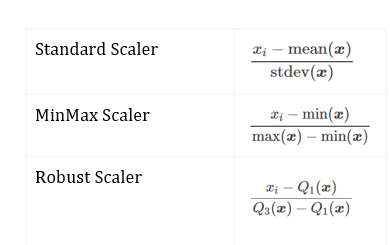

In [43]:
# Convert Date column to datetime form
btc_df['date'] = pd.to_datetime(btc_df['date'])
# Set Date column as index
btc_df = btc_df.set_index(btc_df['date'])
# Delete the initial Date column because Date has been used as an index, besides that, drop the Open, High, Low, Adj Close, and Volume columns
# Because it will only use the Close column
btc_df.drop(columns=['date', 'unix', 'symbol', 'open', 'high', 'low', 'Volume BTC', 'Volume USDT', 'tradecount'], inplace=True)
# Delete columns that have NaNs values ​​or are empty
btc_df.dropna(inplace=True) 

In [44]:
# Convert dataframe to numpy array
dataset = btc_df.values

# Create a separate scaler that works on a single column for predictive scaling with a range between 0 and 1
scaler_pred = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_pred.fit_transform(dataset)
print(scaled_data)

[[0.24325191]
 [0.21897963]
 [0.20644397]
 ...
 [0.26471625]
 [0.26376965]
 [0.26435972]]


## Transforming data and split data to Train and Test
An essential step in time series prediction is to slice the data into multiple input data sequences with associated target values. For this process, we use a sliding windows algorithm. This algorithm moves a window step by step through the time series data, adding a sequence of data points to the input data with each step. In addition, the algorithm stores the target value (e.g., Closing Price) following this sequence in a separate target data set. Then the algorithm pushes the window one step further and repeats these activities. In this way, the algorithm creates a data set with many input sequences (mini-batches), each of which has a corresponding target value in the target record. This process applies both to the creation of the training and the test data.

We will apply the sliding window approach to our data. The result is a training set (x_train) that contains 3607 input sequences, and each has 60 time-steps and one features. The corresponding target dataset (y_train) contains 3607 target values.

In [45]:
# np.random.seed(7)
# tf.random.set_seed(7)
# random.seed(7)

# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 60

# Split training data into training data sets and train
# As a first step, get the number of rows to train the model on 80% data
train_data_length = math.ceil( len(dataset) * 0.8 )

# Create training and test data
train_data = scaled_data[0:train_data_length, :]
test_data = scaled_data[train_data_length - sequence_length:, :]

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) # Contains sequence_length values 0-sequence_length * columns
        y.append(data[i, 0]) # Contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

# Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(1270, 60, 1)
(332, 60, 1)


# **5. Modeling LSTM Architecture**
After we have prepared the data, we can train the LSTM for stock market prediction. The architecture of our neural network consists of the following four layers:

*   LSTM layer, which takes our mini-batches as input and returns the whole sequence
*   LSTM layer that takes the sequence from the previous layer, but only return 1 values
*   Dense layer with 25 neurons
*   Final dense layer that outputs the predicted value

The number of neurons in the first layer must be equal to the size of a minibatch of the input data. Each minibatch in our dataset consists of a matrix with 60 steps and one features. Thus, the input layer of our recurrent neural network consists of 60 neurons.

In [46]:
# Configure the neural network model
LSTM_model = Sequential()

# The number of neurons is determined from the result of x_train.shape[1] multiplied by x_train.shape[2] which means 60 * 1 = 60
N_neurons = x_train.shape[1] * x_train.shape[2]
print(N_neurons, x_train.shape[1], x_train.shape[2])
LSTM_model.add(LSTM(N_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
LSTM_model.add(LSTM(32, return_sequences=False))
LSTM_model.add(Dense(32))
LSTM_model.add(Dense(1))

# Compile model using loss mse, optimizer adam
# For the optimizer, if you want to use another optimizer option, you can use rmsprop or sgd
LSTM_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
# Summarize the architecture of the model that has been created
LSTM_model.summary()

60 60 1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 60)            14880     
                                                                 
 lstm_9 (LSTM)               (None, 32)                11904     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 27,873
Trainable params: 27,873
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Training the model
epochs = 50
batch_size = 16
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='LSTM-Stock-Market.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
history = LSTM_model.fit(x_train, y_train, callbacks=[es, mcp], validation_split=0.2, batch_size=batch_size, epochs=epochs)

Epoch 1/50
59/64 [==========================>...] - ETA: 0s - loss: 7.7195e-04 - mae: 0.0193
Epoch 1: val_loss improved from inf to 0.00495, saving model to LSTM-Stock-Market.h5
64/64 [==============================] - 4s 20ms/step - loss: 7.2968e-04 - mae: 0.0186 - val_loss: 0.0049 - val_mae: 0.0529
Epoch 2/50
63/64 [============================>.] - ETA: 0s - loss: 1.3040e-04 - mae: 0.0084
Epoch 2: val_loss did not improve from 0.00495
64/64 [==============================] - 1s 9ms/step - loss: 1.2984e-04 - mae: 0.0084 - val_loss: 0.0071 - val_mae: 0.0643
Epoch 3/50
64/64 [==============================] - ETA: 0s - loss: 1.0385e-04 - mae: 0.0074
Epoch 3: val_loss did not improve from 0.00495
64/64 [==============================] - 1s 9ms/step - loss: 1.0385e-04 - mae: 0.0074 - val_loss: 0.0099 - val_mae: 0.0750
Epoch 4/50
64/64 [==============================] - ETA: 0s - loss: 9.2721e-05 - mae: 0.0070
Epoch 4: val_loss did not improve from 0.00495
64/64 [=========================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


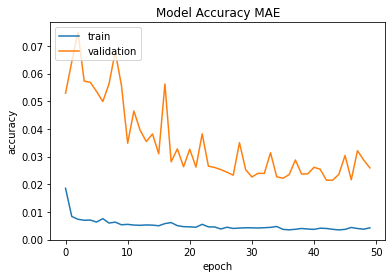

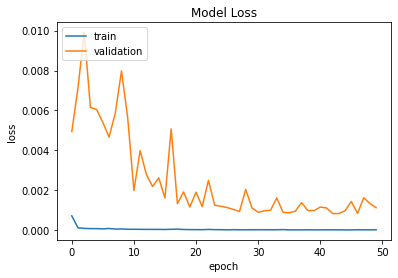

In [48]:
# List all data in history model
print(history.history.keys())
# Summarize history for MAE accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy MAE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for Loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **6. A Evaluate Model Performance**

Now that we have trained our model, it is time to look at its performance. But, first, we have to reverse the scaling for the predictions. We will calculate three error metrics, MAE, MAPE, RMSE, and R2 Score. Then we will compare the predictions in a line plot with the actual values.

In [49]:
# Print evaluation metrics for all data sets
train_eval = LSTM_model.evaluate(x_train, y_train, verbose=0)
test_eval = LSTM_model.evaluate(x_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}'.format(train_eval[0], train_eval[1]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}'.format(test_eval[0], test_eval[1]))

# Get the predicted values
y_train_pred_scaled = LSTM_model.predict(x_train)
# Unscale the predicted values 
y_train_pred = scaler_pred.inverse_transform(y_train_pred_scaled)
y_train_unscaled = scaler_pred.inverse_transform(y_train.reshape(-1, 1))

# Get the predicted values
y_test_pred_scaled = LSTM_model.predict(x_test)
# Unscale the predicted values 
y_test_pred = scaler_pred.inverse_transform(y_test_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Percentage Error (MAPE)
TRAIN_MAPE = np.mean((np.abs(np.subtract(y_train_unscaled, y_train_pred)/ y_train_unscaled))) * 100
print(f'TRAIN Mean Absolute Percentage Error (MAPE): {np.round(TRAIN_MAPE, 2)} %')
TEST_MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_test_pred)/ y_test_unscaled))) * 100
print(f'TEST Mean Absolute Percentage Error (MAPE): {np.round(TEST_MAPE, 2)} %')

# Root Mean Square Error (RMSE)
TRAIN_RMSE = np.sqrt( np.mean(y_train_pred - y_train_unscaled)**2 )
print(f'TRAIN Root Mean Square Error (RMSE): {np.round(TRAIN_RMSE, 2)}')
TEST_RMSE = np.sqrt( np.mean(y_test_pred - y_test_unscaled)**2 )
print(f'TEST Root Mean Square Error (RMSE): {np.round(TEST_RMSE, 2)}')

# R2 Score
r2_acc = r2_score(y_test_unscaled, y_test_pred)
print(f'TEST R2 Score: {np.round(r2_acc, 2)}')

 
Evaluation metrics
Training Data - Loss: 0.0003, MAE: 0.0099
Test Data - Loss: 0.0009, MAE: 0.0230
TRAIN Mean Absolute Percentage Error (MAPE): 4.69 %
TEST Mean Absolute Percentage Error (MAPE): 3.39 %
TRAIN Root Mean Square Error (RMSE): 483.53
TEST Root Mean Square Error (RMSE): 1031.34
TEST R2 Score: 0.97


# **7. A Predict Future Day’s Price**

After we have trained the neural network, we can forecast the stock market for 20th next day. For this purpose, we use testing data and preprocess it in the same way as we did for model training.

We trained our model with mini-batches of 60 time-steps and one features. Thus, we also need to provide the model with 60-time steps when making the forecast. As before, we transform the data into the shape 20 x 60 x 1, whereby the last figure is the number of feature columns. After generating the forecast, we unscale the stock market predictions back to the original range of values.

In [50]:
x_future = 60
predictions = np.array([])
last = x_test[-1]
print(last)
for i in range(x_future):
  forecast = LSTM_model.predict(np.array([last]))
  last = np.concatenate([last[1:], forecast])
  predictions = np.concatenate([predictions, forecast[0]])
predictions = scaler_pred.inverse_transform([predictions])[0]
print(predictions)

[[0.50161108]
 [0.47931441]
 [0.41770912]
 [0.43233717]
 [0.40259004]
 [0.40143648]
 [0.40543716]
 [0.41787129]
 [0.43718509]
 [0.41456362]
 [0.42344067]
 [0.39654751]
 [0.4214862 ]
 [0.40409935]
 [0.40789401]
 [0.42109298]
 [0.40267105]
 [0.41115177]
 [0.40940363]
 [0.40410464]
 [0.39521778]
 [0.40146105]
 [0.40825225]
 [0.44348744]
 [0.4445264 ]
 [0.41350351]
 [0.42356024]
 [0.41186125]
 [0.4144086 ]
 [0.41526642]
 [0.4378725 ]
 [0.43402   ]
 [0.4197065 ]
 [0.41823186]
 [0.40240252]
 [0.39202875]
 [0.36326103]
 [0.29971168]
 [0.29425409]
 [0.30120917]
 [0.26727556]
 [0.2683251 ]
 [0.24503286]
 [0.26996067]
 [0.26995896]
 [0.27228551]
 [0.26084898]
 [0.27829678]
 [0.28028017]
 [0.28422177]
 [0.27717635]
 [0.27258155]
 [0.26540941]
 [0.26294836]
 [0.26013716]
 [0.24983756]
 [0.2494179 ]
 [0.25039777]
 [0.26471625]
 [0.26376965]]
[19860.46867749 19493.62574773 19015.1766374  18478.32058646
 17918.15446879 17359.20929529 16815.44829715 16291.92967163
 15787.40851569 15297.12659716 14815.

In [51]:
dicts = []
forecast_date = btc_df.index[-1]
for i in range(x_future):
  forecast_date = forecast_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": forecast_date})

future_lstm = pd.DataFrame(dicts).set_index("Date")
future_lstm.to_csv('Result-Predict-LSTM-60Days-After.csv')
future_lstm

,Predictions
Date,
2022-07-07,19860.468677
2022-07-08,19493.625748
2022-07-09,19015.176637
2022-07-10,18478.320586
2022-07-11,17918.154469
2022-07-12,17359.209295
2022-07-13,16815.448297
2022-07-14,16291.929672
2022-07-15,15787.408516


In [53]:
# Create a graph of predictive results
train = btc_df[:train_data_length + 1]
test = btc_df[train_data_length:]
test['Predictions'] = y_test_pred

trace1 = go.Scatter(
    x = train.index,
    y = train['close'],
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = test.index,
    y = test['Predictions'],
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = test.index,
    y = test['close'],
    mode='lines',
    name = 'Ground Truth'
)
trace4 = go.Scatter(
    x = future_lstm.index,
    y = future_lstm['Predictions'],
    mode='lines',
    name = 'Future Price'
)
layout = go.Layout(
    title = "Bitcoin Price",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()

# **8. Conclusion**

### **EDA**
---
- Dari hasil informasi explorasi data pergerakan harga bitcoin diatas, kita bisa menarik kesimpulan bahwa. Harga pergerkan bitcoin harus selalu beriringan dengan volume.
- Harga bitcoin cenderung fluktuatif, apalagi terkait tokoh dalam melakukan twet sangat mempengaruhi pergerakan harga bitcoin. 
- Fundametal pergerakan harga bitcoin bergantung pada supply and demand dan juga berita2 yang mengaikan ke bitcoin. Sehingga pergerakan bitcoin sangat berpengaruh
- dari periode 2018-2022 bitcoin masih mengalami kenaikan, tetapi dalam 10 bulan terakhir bicoin mengalami tren harga penurunan.

### **Model**
---
- Dari hasil melakukan pembuatan model menggunakan arsitektur LSTM
- Model memang mengalami overfitting tetapi dari hasil matrix error model mampu menghasilkan angka erorr yang cukup rendah
- Dari hasil prediski model terlihat juga bahwa model memperkirakan pergerkakan bitcoin kedepan masih mengalami penurunan, tetpi kita tidak tahu juga, bagaiman kondisi pasar kedepan.